# Improving City-Business Collaboration: A Data Science Approach

### Notebook by Carlos GIRONDA

To enjoy a full viewing experience of <a href="https://nbviewer.jupyter.org/github/cgironda/CDP_prj/blob/main/CDP_final.ipynb">this notebook</a>, you can also use nbviewer.

## Table of Contents <a name="TOC"></a>
1. [Required Python Libraries](#RPL)
2. [Abstract](#abs)
2. [Introduction](#intro)
3. [Overview of the Cities Datasets](#overview_1)
   - [Cities Disclosing and Cities Responses Datasets](#cdcrd)
4. [Analyzing the Datasets](#ad)
   - [Cities Disclosing Dataset](#cdd)
   - [Map of the Organizations Locations](#mol)
   - [Cities Responses Dataset](#crd)
       - [Cities Responses by Year, Country and Question Number](#crgc)
5. [Overview of the Corporations Datasets](#overview_2)
   - [Corporations Disclosing and Responses Datasets](#cdrd)
   - [Climate Change Corporations Datasets](#cccd)
6. [Corporations: Analyzing Low-Carbon Energy Technologies](#alcet)
7. [Cities: Analyzing Sources of Renewable Energy](#asre)
8. [Conclusions](#conclusions)

## Required Python Libraries <a name="RPL"></a>
[back to the top](#TOC)

This notebook uses the following Python libraries, 

- Pandas: Provides a DataFrame structure to store data
- NumPy: Provides a numerical array structure for data
- Folium: Plotting library that provides a interactive Leaflet map
- Matplotlib: Python 2D plotting library that produces quality figures
- NLTK : It is a platform that help us to work with human language data
- WordClouds: Online word cloud generator and tag cloud creator library
- Scikit-Learn: Library that gives tools for predictive data analysis
- Seaborn: Lybrary for data visualization to draw informative statistical graphics

### Abstract <a name="abs"></a>

In order to investigate the impact of low-carbon technology used by Corporations over the sources of renewable energy used by Cities in the US, datasets disclosed by the international non-profit organization CDP (Carbon Disclosure Project) were analyzed for the year 2018.

To perform this task, text preprocessing was applied, and found that Corporations tend to use Aeolic energy over other renewable sources of energy. However, cities have installed more renewable energy via photovoltaic systems.

## Introduction <a name="intro"></a>
[back to the top](#TOC)

Several technologies based on sources of renewable energy, as well as operational approaches, can reduce cost-effectively energy consumption dramatically, and helps to avoid social problems providing equivalent or better quality of life and services.

These technologies can be enhanced by integrated systems of renewable energy that are less risky to implement in a natural environment by companies, but it needs information such as:

   - a) The most low-carbon energy source technology used by corporations
   - b) The amount of installed renewable energy in natural environments or cities' boundaries

If these two items can be answered, it is possible to create collaboration between cities and corporations taking account that in a periodic electric power demand cycle the pick demand of energy can be solved by the energy storage of renewable energy, such as photovoltaic systems, wind turbines, hydropower plants, etc.

The following sections explain how items a) and b) are reached, which reflect the underlying data.

## Overview of the Cities Datasets <a name="overview_1"></a>
[back to the top](#TOC)

The code below reads automatically the **Cities**, **Corporations**, and **Supplementary Data** <a href="https://www.kaggle.com/c/cdp-unlocking-climate-solutions/data" target="_blank">files provided by the CDP</a>.

Just download these folders to a folder of your PC, and from there the CSV format files are only read.

Let's load all the CSV files format into the `files_csv` list.

In [1]:
import os
import glob

def READ_FILES(ext, subfolder, nest_num, nest_fld):

    data_list = {}
    fld = next(os.walk(os.getcwd()))[1][subfolder]

    for folder in glob.glob(fld + nest_fld):
        data_list[folder.split('/')[nest_num]] = []
        for datafile in glob.glob(folder + ext):
            data_list[folder.split('/')[nest_num]].append(datafile)

    files_list = []
    for key in data_list.keys():
        files_list.append(data_list[key])
    return(files_list)

In [2]:
from itertools import chain

stg02, stg1 = '/*/*.csv', '/*/*/*.csv'
fls0, fls1, fls2 = READ_FILES('', 0, 2, stg02), READ_FILES('', 1, 3, stg1), READ_FILES('', 2, 2, stg02)
files_csv = sorted(list(chain(*(fls0 + fls1 + fls2))))

In [3]:
files_csv

['Cities/Cities Disclosing/2018_Cities_Disclosing_to_CDP.csv',
 'Cities/Cities Disclosing/2019_Cities_Disclosing_to_CDP.csv',
 'Cities/Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv',
 'Cities/Cities Disclosing/Cities_Disclosing_to_CDP_Data_Dictionary.csv',
 'Cities/Cities Responses/2018_Full_Cities_Dataset.csv',
 'Cities/Cities Responses/2019_Full_Cities_Dataset.csv',
 'Cities/Cities Responses/2020_Full_Cities_Dataset.csv',
 'Cities/Cities Responses/Full_Cities_Response_Data_Dictionary.csv',
 'Corporations/Corporations Disclosing/Climate Change/2018_Corporates_Disclosing_to_CDP_Climate_Change.csv',
 'Corporations/Corporations Disclosing/Climate Change/2019_Corporates_Disclosing_to_CDP_Climate_Change.csv',
 'Corporations/Corporations Disclosing/Climate Change/2020_Corporates_Disclosing_to_CDP_Climate_Change.csv',
 'Corporations/Corporations Disclosing/Water Security/2018_Corporates_Disclosing_to_CDP_Water_Security.csv',
 'Corporations/Corporations Disclosing/Water Security/2019_Co

### Cities Disclosing and Cities Responses Datasets<a name="cdcrd"></a>
[back to Overview of the Datasets](#overview)

Let's see how the features of the `Cities_Disclosing` and `Cities Responses` csv format files are configurated for the year 2018:

In [4]:
import pandas as pd

df_cidis18, df_cires18 = pd.read_csv(files_csv[0]), pd.read_csv(files_csv[4]) # Disclosing # Responses
print(df_cidis18.info())
print('\n')
print(df_cires18.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year Reported to CDP  641 non-null    int64  
 1   Account Number        641 non-null    int64  
 2   Organization          641 non-null    object 
 3   City                  641 non-null    object 
 4   Country               641 non-null    object 
 5   CDP Region            641 non-null    object 
 6   Reporting Authority   641 non-null    object 
 7   Access                641 non-null    object 
 8   First Time Discloser  641 non-null    object 
 9   Population            586 non-null    float64
 10  Population Year       641 non-null    int64  
 11  City Location         641 non-null    object 
 12  Last update           641 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 65.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186834 ent

Now that we see what features these **CSV** files have, let's join the **Cities Disclosing** and **Cities Responses** files of 2018, 2019 and 2020.

In [5]:
# Cities Disclosing Datasets
df_cidis = pd.concat([pd.read_csv(files_csv[i], encoding = "utf-8") for i in range(2+1)])
col_cidis = [*(df_cidis.columns[0:5+1]), *(df_cidis.columns[9:11+1])]
df_cidis = df_cidis[col_cidis].reset_index(drop=True)
# Cities Responses Datasets
df_cires = pd.concat([pd.read_csv(files_csv[i], encoding = "utf-8", low_memory=False) for i in range(4, 6+1)])
df_cires = df_cires[df_cires.columns[1:15]].reset_index(drop=True)

In [6]:
df_cidis.head(3)

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Population,Population Year,City Location
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,62686.0,2017,POINT (12.5921 56.0308)
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,126487.0,2012,POINT (-70.6092 -33.4313)
2,2018,50553,City of Fresno,Fresno,United States of America,North America,527438.0,2017,POINT (-119.773 36.7468)


In [7]:
df_cires.head(3)

,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer
0,2018,3203,City of Chicago,United States of America,North America,Water,Wastewater,16.1,Please provide the percentage breakdown of the...,1,Percentage of wastewater collected,5,Other type of wastewater,NaN
1,2018,50555,City of Hamilton,Canada,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,Probability of hazard,4,NaN,Medium High
2,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction: City-wide,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,3,NaN,On-site renewable energy generation


## Analyzing the Datasets <a name="ad"></a>
[back to the top](#TOC)

### Cities Disclosing Dataset<a name="cdd"></a>
[back to Analyzing the Datasets](#ad)

In this section we analize the data to create a **map** that visually summarizes the information in the `df_cidis` DataFrame. The analysis starts cleaning the `City Location` feature and extract the **(latitude, longitude)** coordinates. There is no special reason to proceed in this way, however, it would be ideal to analize data that can be visualized in the aforementioned map.

In [8]:
# Number of 'City Location' rows that does have NANs
df_cidis['City Location'].isna().sum()

438

Next we insert **zero** as an string object type into the NAN places of the `df_cidis` DataFrame.

In [9]:
df_cidis.fillna(str(0), inplace=True) # We fill with 'zeros' the 'NAN' places
df_cidis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year Reported to CDP  2068 non-null   int64 
 1   Account Number        2068 non-null   int64 
 2   Organization          2068 non-null   object
 3   City                  2068 non-null   object
 4   Country               2068 non-null   object
 5   CDP Region            2068 non-null   object
 6   Population            2068 non-null   object
 7   Population Year       2068 non-null   int64 
 8   City Location         2068 non-null   object
dtypes: int64(3), object(6)
memory usage: 145.5+ KB


The `City Location` column is cleaned considering only elements different from **zero** string.

In [10]:
import numpy as np
import re

lon_lat_index, lon_lat_list = ([] for l in range(2))

for idx_cl, j in enumerate(df_cidis['City Location']): # Remember that we need the 'indexes'
    if j != str(0): # The 'City Location' column is given by 'Longitude' and 'Latitude'
        lon_lat = tuple(map(float, re.sub(r'[POINT \(\)]', " ", j).strip().split()))
        lon_lat_list.append(lon_lat) # List of 'Longitude' and 'Latitude' - 2018, 2019, 2020
        lon_lat_index.append(idx_cl) # List of indexes that have not NULL values in 'City Location' column

From the `City Location` feature the `longitude` and `latitude` are extracted and put them as columns into the `df_cidis_cl` DataFrame.

In [11]:
df_cidis_crd = df_cidis.copy() # We preserve the ORIGINAL DataFrame
df_lon_lat = pd.DataFrame(lon_lat_list, columns=['longitude', 'latitude'], index=lon_lat_index)
df_cidis_cl = pd.concat([df_cidis_crd.iloc[lon_lat_index], df_lon_lat], axis=1)
df_cidis_cl.head(5)

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Population,Population Year,City Location,longitude,latitude
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,62686,2017,POINT (12.5921 56.0308),12.5921,56.0308
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,126487,2012,POINT (-70.6092 -33.4313),-70.6092,-33.4313
2,2018,50553,City of Fresno,Fresno,United States of America,North America,527438,2017,POINT (-119.773 36.7468),-119.7730,36.7468
3,2018,826407,Munícipio de Mirandela,Mirandela,Portugal,Europe,11852,2011,POINT (-7.1753 41.51),-7.1753,41.5100
4,2018,60375,Gobiernación del Archipiélago de San Andrés,Archipiélago de San Andrés,Colombia,Latin America,120000,2017,POINT (-81.6976 12.5794),-81.6976,12.5794


In [12]:
df_cidis_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630 entries, 0 to 2064
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year Reported to CDP  1630 non-null   int64  
 1   Account Number        1630 non-null   int64  
 2   Organization          1630 non-null   object 
 3   City                  1630 non-null   object 
 4   Country               1630 non-null   object 
 5   CDP Region            1630 non-null   object 
 6   Population            1630 non-null   object 
 7   Population Year       1630 non-null   int64  
 8   City Location         1630 non-null   object 
 9   longitude             1630 non-null   float64
 10  latitude              1630 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 152.8+ KB


We sort values under the `'Acount Number'` column in the `df_cidis_cl` Dataframe to get the `'Population'` for every year in the `Year Reported to CDP` column that corresponds to the cities disclosure cycle survey year.

In [13]:
# 'df_cidis_cl' DataFrame has non-ZERO values in the 'City Location' column plus two additional columns
df_cidis_cl.sort_values(['Account Number', 'Year Reported to CDP'], inplace=True)
df_cidis_cl.head()

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Population,Population Year,City Location,longitude,latitude
464,2018,1093,City of Atlanta,Atlanta,United States of America,North America,450182,2017,POINT (-84.388 33.749),-84.3880,33.7490
1362,2019,1093,City of Atlanta,Atlanta,United States of America,North America,450182,2017,POINT (-84.388 33.749),-84.3880,33.7490
339,2018,1184,City of Austin,Austin,United States of America,North America,1.26597e+06,2017,POINT (-97.7431 30.2672),-97.7431,30.2672
877,2019,1184,City of Austin,Austin,United States of America,North America,1.227e+06,2017,POINT (-97.7431 30.2672),-97.7431,30.2672
2016,2020,1184,City of Austin,Austin,United States of America,North America,964254,2019,POINT (-97.7431 30.2672),-97.7431,30.2672


It must be noticed that some elements of the `City Location` column are repeated. One of the reasons is because, the `df_cidis` DataFrame is the result of joining the csv files of three consecutive years 2018, 2019 and 2020.

Let's find the indices of duplicate rows for the `longitude` and `latitude` columns of the `df_cidis_cl` DataFrame. We just need to keep ONE SINGLE pair `longitude` and `latitude` coordinates to visualize the city on the map.

But on the other hand, we need to know which duplicated indexes were erased, because we will use that indexes plus the non-deleted index to localize the `Year Reported to CDP` and `Population` columns that will pop-up at every `City Location` in the map.

In [14]:
# We extract the 'latitude' and 'longitude' columns from 'df_cidis_cl' DataFrame
lat_lon_df = df_cidis_cl[['latitude', 'longitude']]
lat_lon_df = lat_lon_df[lat_lon_df.duplicated(keep=False)] # The duplicated rows are identified
# The following code extract the duplicated indexes of the 'latitude' and 'longitude'
lat_lon_idx = lat_lon_df.groupby(list(lat_lon_df)).apply(lambda x: tuple(x.index)).tolist()
lat_lon_idx[:5] # These are the FIRST 5 duplicated indexes of the 'latitude' and 'longitude'

[(217, 696, 2023),
 (45, 757, 1676),
 (418, 1407, 1631),
 (245, 708, 1610),
 (284, 730)]

Only the first index of every tuple is extracted and stored in the `idx0_lat_lon` list. This list is used to construct the `df_lat_lon` DataFrame from the `df_cidis_cl` DataFrame. The new DF have unique `latitude` and `longitude` rows.

In [15]:
idx0_lat_lon = [idx[0] for idx in lat_lon_idx] # Extract first indexes of every tuple in 'lat_lon_idx'
df_lat_lon = pd.DataFrame(df_cidis_cl[['latitude', 'longitude']].loc[idx0_lat_lon])
df_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 217 to 76
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   560 non-null    float64
 1   longitude  560 non-null    float64
dtypes: float64(2)
memory usage: 13.1 KB


In [16]:
df_lat_lon.head()

,latitude,longitude
217,-86.2532,41.67540
45,-84.0796,9.93260
418,-79.6441,43.58900
245,-79.2042,-3.99313
284,-76.9989,-12.10780


The `get_reverse_geocode_data` function used in the <a href="https://medium.com/@ericsalesdeandrade/how-to-call-rest-apis-with-pandas-and-store-the-results-in-redshift-2b35f40aa98f" target="_blank">article of Eric Sales</a>, helps to construct a new DataFrame that contains the addresses of their corresponding geographical coordinates.

It must be mentioned that the `get_reverse_geocode_data` function must be used with unique `latitude` and `longitud` values, contained in the `df_lat_lon` DataFrame.

In [17]:
import requests, json, time

def get_reverse_geocode_data(row):
    try:
        YOUR_API_KEY = 'xxxxxxxxxxxxxx' # You should change to your own 'YOUR_API_KEY'
        url = 'https://eu1.locationiq.org/v1/reverse.php?key=' + YOUR_API_KEY \
            + '&lat=' + str(row['latitude']) + '&lon=' + str(row['longitude']) + '&format=json'
        response = (requests.get(url).text)
        response_json = json.loads(response)
        time.sleep(0.5)
        return(response_json)
    
    except Exception as e:
        raise e

After we receive the JSON response, the `API_response` column is inserted into the `df_lat_lon` DataFrame. Once the `API_response` column is flatten into columns using the `pd.json_normalize()` command, we pick up the features that we need.

Unfortuntely, the `INDEXES` are lost in this process when the `df_API` DataFrame is created but we recover these indexes from the `df_lat_lon` DataFrame later, then this `df_API` DataFrame is renamed as `df_api_clean` DataFrame.

In [18]:
df_lat_lon['API_response'] = df_lat_lon.apply(get_reverse_geocode_data, axis=1)
df_API = pd.json_normalize(df_lat_lon['API_response']) # The `df_API` DataFrame is created
df_API = df_API[['lat', 'lon', 'display_name']]

In [19]:
print(df_API.head())
print('\n')
print(df_API.tail())
print('\n')
print(df_API.info())

   lat  lon display_name
0  NaN  NaN          NaN
1  NaN  NaN          NaN
2  NaN  NaN          NaN
3  NaN  NaN          NaN
4  NaN  NaN          NaN


                  lat              lon  \
555  65.7364675734004  24.563729413213   
556               NaN              NaN   
557               NaN              NaN   
558               NaN              NaN   
559               NaN              NaN   

                                          display_name  
555  Keskuspuistokatu, Ruutti, Kemi, Kemi-Tornion s...  
556                                                NaN  
557                                                NaN  
558                                                NaN  
559                                                NaN  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lat           544 non-null    object
 1   lon           54

The info above shows `544 non-null` elements from `560 rows`. This is because some `(latitude, longitude)` coordinates were not identified by the `get_reverse_geocode_data()` function.

On the other hand, the `lat` and `lon` columns are no longer numeric. So, the below process is applied, were indexes of `df_lat_lon` becomes indexes of `df_api`.

In [20]:
df_API[['lat', 'lon']] = df_API[['lat', 'lon']].apply(pd.to_numeric) # 'lat', 'lon' columns are numeric
df_api = df_API.copy() # We preserve the original output of the `get_reverse_geocode_data` function
df_api.index = df_lat_lon.index # The original indexes of `df_lat_lon` are put into the `df_api`
df_api.head()

,lat,lon,display_name
217,NaN,NaN,NaN
45,NaN,NaN,NaN
418,NaN,NaN,NaN
245,NaN,NaN,NaN
284,NaN,NaN,NaN


The `NaN` values of the `df_api` DataFrame are expresed below together with its indexes and its total number of `NaN` values for each column.

In [21]:
df_api_null = df_api[df_api.isnull().any(axis=1)]
print(df_api_null)
print('\n')
print(df_api.isnull().sum())

     lat  lon display_name
217  NaN  NaN          NaN
45   NaN  NaN          NaN
418  NaN  NaN          NaN
245  NaN  NaN          NaN
284  NaN  NaN          NaN
430  NaN  NaN          NaN
383  NaN  NaN          NaN
638  NaN  NaN          NaN
636  NaN  NaN          NaN
321  NaN  NaN          NaN
105  NaN  NaN          NaN
256  NaN  NaN          NaN
69   NaN  NaN          NaN
416  NaN  NaN          NaN
429  NaN  NaN          NaN
76   NaN  NaN          NaN


lat             16
lon             16
display_name    16
dtype: int64


Using the `idx0_lat_lon` and `df_api_null.index` lists of `NaNs` values, the `non_null_idx` is obtained to get the `df_api_clean` DataFrame which has `non-NaN` values.

In [22]:
non_null_idx = [idx for idx in idx0_lat_lon if idx not in df_api_null.index]
df_api_clean = df_api.loc[non_null_idx]
df_api_clean

,lat,lon,display_name
609,-53.786066,-67.700034,"Jardín de Infantes N° 4 ""Arcoíris"", 632, Berna..."
356,-42.889417,147.280931,"4, Old Farm Road, South Hobart, Hobart, Tasman..."
572,-41.286478,174.776015,"4, Willis Street, Wellington Central, Wellingt..."
35,-39.104705,174.350767,"Otaraoa Road, Tarata, New Plymouth, New Plymou..."
118,-37.814116,144.962917,"175, Elizabeth Street, Melbourne, Melbourne, V..."
...,...,...,...
152,63.430458,10.395600,"Torvet, Kongens gate, Kalvskinnet, Midtbyen, T..."
137,63.825965,20.262961,"Dressmann, Rådhustorget, Centrum, Centrala sta..."
286,64.126538,-21.817354,"6, Vagnhöfði, Höfðar, Grafarvogur, Reykjavik, ..."
261,65.688585,-18.125934,"4, Brattahlíð, Hlíðarhverfi, Akureyri, Akureyr..."


In [23]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 609 to 599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat           544 non-null    float64
 1   lon           544 non-null    float64
 2   display_name  544 non-null    object 
dtypes: float64(2), object(1)
memory usage: 17.0+ KB


The `df_api_clean` DataFrame above is clean of `NaNs` elements. 

The `lat_lon_list` list below, contains a list of `tuple` elements that are used to identify the cities in a `Folium map`. The `lat_lon_idx` is used to create the `df_citis_flt` DataFrame.

In [24]:
lat_lon_list = list(df_api_clean.to_records())
lat_lon_list[0:5] # These are the first five tuples in the 'lat_lon_list' list

[(609, -53.78606605, -67.70003382, 'Jardín de Infantes N° 4 "Arcoíris", 632, Bernardino Rivadavia, Esperanza, Rio Grande, Municipio de Río Grande, Departamento Río Grande, Tierra del Fuego Province, V9420, Argentina'),
 (356, -42.889417, 147.280931, '4, Old Farm Road, South Hobart, Hobart, Tasmania, Australia, 7004'),
 (572, -41.286478, 174.776015, '4, Willis Street, Wellington Central, Wellington City, Wellington Region, New Zealand'),
 (35, -39.10470545, 174.35076726, 'Otaraoa Road, Tarata, New Plymouth, New Plymouth District, Taranaki, 4383, New Zealand'),
 (118, -37.814116, 144.962917, '175, Elizabeth Street, Melbourne, Melbourne, Victoria, Australia')]

To clean the `df_citis_cl` DataFrame free of `NaN` elements in its `longitude` and `latitude` columns, the `df_citis_flt` is created.

We extract the `NaNs` indexes of tuples from the total `lat_lon_idx` list into the `idx_nan` list. 
From there, we create the `idx_nonan` list of tuples which is flatten to obtain the `df_citis_flt` DataFrame.

In [25]:
idx_nan = [] # List of tuples of indexes that will contain rows with 'NaNs' elements
for i in lat_lon_idx:
    for j in df_api_null.index: # We need the NaNs indexes of the 'df_api_null' DataFrame
        if i[0] == j:
            idx_nan.append(i)

idx_nonan = [i for i in lat_lon_idx if i not in idx_nan] # List of tuples of indexes that have non-NaNs
idx_flatten = [j for i in idx_nonan for j in i] # List of tuples of indexes that were flatten 

In [26]:
df_citis_flt = df_cidis_cl.loc[idx_flatten]
df_citis_flt.head()

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Population,Population Year,City Location,longitude,latitude
609,2018,60419,Municipalidad de Rio Grande,Rio Grande,Argentina,Latin America,84246,2017,POINT (-67.7002 -53.786),-67.7002,-53.7860
862,2019,60419,Municipalidad de Rio Grande,Rio Grande,Argentina,Latin America,88741,2019,POINT (-67.7002 -53.786),-67.7002,-53.7860
356,2018,53254,City of Hobart,Hobart,Australia,Southeast Asia and Oceania,50440,2016,POINT (147.281 -42.8901),147.2810,-42.8901
868,2019,53254,City of Hobart,Hobart,Australia,Southeast Asia and Oceania,0,0,POINT (147.281 -42.8901),147.2810,-42.8901
2012,2020,53254,City of Hobart,Hobart,Australia,Southeast Asia and Oceania,53684,2020,POINT (147.281 -42.8901),147.2810,-42.8901


After a deep analysis over the `df_citis_flt` DataFrame, it shows that the `Account Number` and `City Location` columns are not correlated, i.e. the number of unique identifiers `Account Number` given to every city organisation that receives a request to complete a CDP questionnaire which is **551**, is not equal to the number of elements of the unique coordinates **544** of the `City Location` column as shown below using the `citis_flt()` function:

In [27]:
def citis_flt(df, col1, col2):
    years = 3 # The 'City Location' shows up to three times
    col1_u, col2_u = df[col1].nunique(), df[col2].nunique()
    df_g = df.groupby([col2]).filter(lambda x: len(x) > years)
    df_nu = df_g[col2].nunique()
    return([col1_u, col2_u, df_nu, df_g])

For the years 2018, 2019, 2020, the `City Location` coordinates should be shown up to **three times** unless that for the same location there are different unique identifiers in the `Account Number`. In this case, it appears **five** times as shown below.

In [28]:
citis_flt(df_citis_flt, 'Account Number', 'City Location')[0:2+1]

[551, 544, 5]

As shown below there are **26** unique identifiers in the `Account Number` that are not count in the rest of the analysis. It has been proceed in this way, because in some cases there is no information about the `Population` in some particular year for the `Year Reported to CDP`  column, or because the same **population** is used for differents identifiers in the `Account Number` column.

In [29]:
df_citis_nou = citis_flt(df_citis_flt, 'Account Number', 'City Location')[3]
df_citis_nou.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 302 to 1104
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year Reported to CDP  26 non-null     int64  
 1   Account Number        26 non-null     int64  
 2   Organization          26 non-null     object 
 3   City                  26 non-null     object 
 4   Country               26 non-null     object 
 5   CDP Region            26 non-null     object 
 6   Population            26 non-null     object 
 7   Population Year       26 non-null     int64  
 8   City Location         26 non-null     object 
 9   longitude             26 non-null     float64
 10  latitude              26 non-null     float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.4+ KB


After extracting the indexes from the `df_citis_nou` DataFrame, the `df_citis_u` unique DataFrame is obtained:

In [30]:
idx_u = [i for i in df_citis_flt.index if i not in df_citis_nou.index]
df_citis_u = df_citis_flt.loc[idx_u]
df_citis_u.head() # Very last clean DataFrame

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Population,Population Year,City Location,longitude,latitude
609,2018,60419,Municipalidad de Rio Grande,Rio Grande,Argentina,Latin America,84246,2017,POINT (-67.7002 -53.786),-67.7002,-53.7860
862,2019,60419,Municipalidad de Rio Grande,Rio Grande,Argentina,Latin America,88741,2019,POINT (-67.7002 -53.786),-67.7002,-53.7860
356,2018,53254,City of Hobart,Hobart,Australia,Southeast Asia and Oceania,50440,2016,POINT (147.281 -42.8901),147.2810,-42.8901
868,2019,53254,City of Hobart,Hobart,Australia,Southeast Asia and Oceania,0,0,POINT (147.281 -42.8901),147.2810,-42.8901
2012,2020,53254,City of Hobart,Hobart,Australia,Southeast Asia and Oceania,53684,2020,POINT (147.281 -42.8901),147.2810,-42.8901


In [31]:
df_citis_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 609 to 1991
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year Reported to CDP  1440 non-null   int64  
 1   Account Number        1440 non-null   int64  
 2   Organization          1440 non-null   object 
 3   City                  1440 non-null   object 
 4   Country               1440 non-null   object 
 5   CDP Region            1440 non-null   object 
 6   Population            1440 non-null   object 
 7   Population Year       1440 non-null   int64  
 8   City Location         1440 non-null   object 
 9   longitude             1440 non-null   float64
 10  latitude              1440 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 135.0+ KB


### Map of the Organizations Locations <a name="mol"></a>
[back to Analyzing the Datasets](#ad)

The following code extract the **Year Reported to CDP, City,** and **Population** features for a unique  **(latitude, longitude)** coordinates, from the `df_citis_u` DataFrame.

Every location in the map below shows its address (after hover the pointer of the mouse on it), thanks to the `get_reverse_geocode_data()` function that use an **API**, which is obtained after creating a FREE account in the `https://locationiq.com/` website. 

After that, if you make a **click** with the mouse over any location in the map, it also shows a **table** with the `Year Reported to CDP`, `City`, and `Population` features obtained from the `df_citis_u` DataFrame.

In [32]:
# We group by 'longitude' and 'latitude' and print 'Year Reported to CDP', 'City', 'Population' columns
df_citis_flt_cp = df_citis_u.copy() # We preserve the 'df_citis_flt' DataFrame
flt_value, flt_key = ([] for l in range(2))
for key, value in df_citis_flt_cp.groupby(by=['latitude', 'longitude']):
    df_citis_mod = value[['Year Reported to CDP', 'City', 'Population']]
    flt_value.append(df_citis_mod) # This list gives a DataFrame of the columns specified in the 'value' item
    flt_key.append(key) # This list gives the (longitude, latitude) coordinate

In [33]:
import folium, branca
import folium.plugins as fp

map_osm = folium.Map(location=[50.7128, 44.0060], zoom_start=2.49, tiles='Stamen Terrain'
                     , max_bounds=True, scrollWheelZoom=False, no_wrap=True)

marker_cluster = fp.MarkerCluster().add_to(map_osm)

loc_df = [(i, j) for i, j in zip(flt_key, flt_value)]
for crd in lat_lon_list:
    for df in loc_df:
        if crd[0] == df[1].index[0]:
            address = str([k.lstrip() for k in crd[3].split(',')][:])[1:-1]
            html = df[1].to_html(classes='table table-striped table-hover table-condensed table-responsive')
            popup_op = folium.Popup(html, max_width='100%')
            folium.Marker(location=[crd[1], crd[2]], popup=popup_op, tooltip=address).add_to(marker_cluster) 
            map_osm.add_child(folium.LatLngPopup(), folium.ClickForMarker(popup='Waypoint'))
map_osm

The above geographical map does show the number of cities per region that answered the questions of the CDP.

The function below `year_nation_city_pop()` is used to obtain the DataFrames, that help us to get the 2D figures of the **twenty** most populated US cities in 2018, 2019, and 2020.

Unlike the **map** shown above, the 2D figures below show the same information in a more compact way.

In [34]:
def year_nation_city_pop(df, year, country, org, pop):
    
    year_CDP = df['Year Reported to CDP'] == year
    nation = df['Country'] == country
    df_u = df[year_CDP & nation]

    org_pop_list = []
    for i, j in df_u.groupby(by=pop):
        if int(i) != 0: # 'Population' --> integers <> This is to avoid 'zero' rows
            k = j[org].array[0]
            org_pop_list.append(tuple([k, i]))
    df_n = pd.DataFrame(org_pop_list, columns=[org, pop])

    return(df_n)

In [35]:
def df_of_df(df, year):
    df_pop = year_nation_city_pop(df, year, 'United States of America', 'Organization', 'Population')
    return(df_pop)

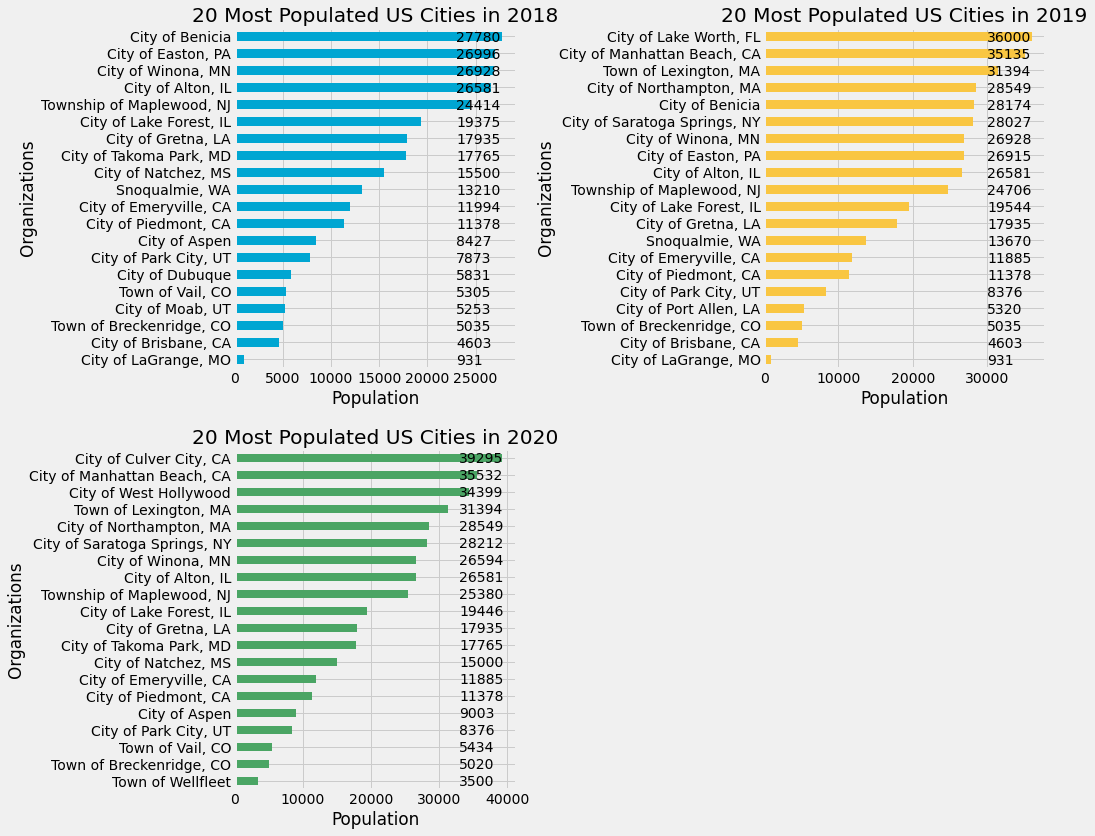

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.figure()

df_short_18 = df_of_df(df_citis_u, 2018).iloc[0:20]
plt.subplot(2, 2, 1)
df_short_18.plot(x = 'Organization', y = 'Population', figsize = (15, 12), kind='barh', fontsize=14
                , legend=False, title='20 Most Populated US Cities in 2018', color='#00a6d2'
                , ax=plt.gca())
plt.xlabel('Population', color='black')
plt.ylabel('Organizations', color='black')
for i in range(len(df_short_18)):
    plt.text(23000, i - 0.3, int(df_short_18['Population'][i]))
## --------------------------
df_short_19 = df_of_df(df_citis_u, 2019).iloc[0:20]
plt.subplot(2, 2, 2)
df_short_19.plot(x = 'Organization', y = 'Population', figsize = (15, 12), kind='barh', fontsize=14
                 , legend=False, title='20 Most Populated US Cities in 2019', color='#f9c642'
                 , ax=plt.gca())
plt.xlabel('Population', color='black')
plt.ylabel('Organizations', color='black')
for i in range(len(df_short_19)):
    plt.text(30000, i - 0.3, int(df_short_19['Population'][i]))
## --------------------------    
df_short_20 = df_of_df(df_citis_u, 2020).iloc[0:20]
plt.subplot(2, 2, 3)
df_short_20.plot(x = 'Organization', y = 'Population', figsize = (15, 12), kind='barh', fontsize=14
                 , legend=False, title='20 Most Populated US Cities in 2020', color='#4aa564'
                 , ax=plt.gca())
plt.xlabel('Population', color='black')
plt.ylabel('Organizations', color='black')
for i in range(len(df_short_20)):
    plt.text(33000, i - 0.3, int(df_short_20['Population'][i]))

plt.tight_layout(pad=1.5)
plt.show()

### Cities Responses Dataset<a name="crd"></a>
[back to Analyzing the Datasets](#ad)

In this section, we select from the `df_cires` DataFrame the `Question Number` feature and its corresponding row on the`Response Answer` feature based on its `Section` feature.

Remember that:

In [37]:
df_cires.head(3)

,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer
0,2018,3203,City of Chicago,United States of America,North America,Water,Wastewater,16.1,Please provide the percentage breakdown of the...,1,Percentage of wastewater collected,5,Other type of wastewater,NaN
1,2018,50555,City of Hamilton,Canada,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,Probability of hazard,4,NaN,Medium High
2,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction: City-wide,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,3,NaN,On-site renewable energy generation


Let's use the indexes of the `df_citis_u` DataFrame to clean the `df_cires` DataFrame based on the `Account Number` column:

In [38]:
ac_citis_u = df_citis_u['Account Number'].unique() # Cleaning list
ac_cires = df_cires['Account Number'].unique()
ac_cires_u = [i for i in ac_cires if i in ac_citis_u] # List that contains unique numbers in 'Account Number'

In [39]:
idx_ac_cires_u = [] # Lists of indexes of unique numbers in 'Account Number' column of 'df_cires' DataFrame
for idx, ide in enumerate(df_cires['Account Number']):
    if ide in ac_cires_u:
        idx_ac_cires_u.append(idx)

The `df_cires_unique` DataFrame contains the identification numbers for the `Account Number` that are in the `df_cities_u`, which has been sorted according to the `Account Number` and `Year Reported to CDP` columns.

In [40]:
df_cires_unique = df_cires.loc[idx_ac_cires_u]
df_cires_unique.sort_values(['Account Number', 'Year Reported to CDP'], inplace=True)
df_cires_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088901 entries, 860 to 1542370
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Year Reported to CDP  1088901 non-null  int64 
 1   Account Number        1088901 non-null  int64 
 2   Organization          1088901 non-null  object
 3   Country               1088901 non-null  object
 4   CDP Region            1088901 non-null  object
 5   Parent Section        901607 non-null   object
 6   Section               1088901 non-null  object
 7   Question Number       1088901 non-null  object
 8   Question Name         1088901 non-null  object
 9   Column Number         1088901 non-null  int64 
 10  Column Name           1036319 non-null  object
 11  Row Number            1088901 non-null  int64 
 12  Row Name              421162 non-null   object
 13  Response Answer       816543 non-null   object
dtypes: int64(4), object(10)
memory usage: 124.6+ MB


In [41]:
df_cires_unique.head()

,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer
860,2018,1093,City of Atlanta,United States of America,North America,Strategy,Energy,9.2a,Please provide details of your renewable energ...,3,Base year,1,NaN,2017
1839,2018,1093,City of Atlanta,United States of America,North America,Water,Water Supply,15.3,Do you foresee substantive risks to your city’...,0,NaN,0,NaN,Yes
2078,2018,1093,City of Atlanta,United States of America,North America,Local Government Emissions,Local Government Operations GHG Emissions Data,6.9,Please indicate if your local government opera...,3,Please explain,1,Please explain,NaN
2186,2018,1093,City of Atlanta,United States of America,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,2,Hazard status,3,NaN,Currently affecting the city
3242,2018,1093,City of Atlanta,United States of America,North America,NaN,Introduction,0.1,Please give a general description and introduc...,1,Administrative boundary,1,City boundary,City / Municipality


The last step is to clean the `df_cires_unique` DataFrame where the `Response Answer` column has rows of `NaN` values:

In [42]:
idx_cires_u = df_cires_unique.index
idx_ra = df_cires_unique[df_cires_unique['Response Answer'].isnull()].index
idx_u = [i for i in idx_cires_u if i not in idx_ra]
df_cires_u = df_cires_unique.loc[idx_u]
df_cires_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816543 entries, 860 to 1541723
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Year Reported to CDP  816543 non-null  int64 
 1   Account Number        816543 non-null  int64 
 2   Organization          816543 non-null  object
 3   Country               816543 non-null  object
 4   CDP Region            816543 non-null  object
 5   Parent Section        682329 non-null  object
 6   Section               816543 non-null  object
 7   Question Number       816543 non-null  object
 8   Question Name         816543 non-null  object
 9   Column Number         816543 non-null  int64 
 10  Column Name           770622 non-null  object
 11  Row Number            816543 non-null  int64 
 12  Row Name              281815 non-null  object
 13  Response Answer       816543 non-null  object
dtypes: int64(4), object(10)
memory usage: 93.4+ MB


In [43]:
df_cires_u.head()

,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer
860,2018,1093,City of Atlanta,United States of America,North America,Strategy,Energy,9.2a,Please provide details of your renewable energ...,3,Base year,1,NaN,2017
1839,2018,1093,City of Atlanta,United States of America,North America,Water,Water Supply,15.3,Do you foresee substantive risks to your city’...,0,NaN,0,NaN,Yes
2186,2018,1093,City of Atlanta,United States of America,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,2,Hazard status,3,NaN,Currently affecting the city
3242,2018,1093,City of Atlanta,United States of America,North America,NaN,Introduction,0.1,Please give a general description and introduc...,1,Administrative boundary,1,City boundary,City / Municipality
3279,2018,1093,City of Atlanta,United States of America,North America,Opportunities,Opportunities,5.0a,Please indicate the opportunities and describe...,1,Opportunity,2,NaN,Increased infrastructure investment


This `df_cires_u` DataFrame was obtained from the indexes of the `df_citis_u` DataFrame based on its `Account Number` column.

#### Cities Responses by Year, Country and Question Number<a name="crgc"></a>
[back to Cities Responses Dataset](#crd)

In the following analysis the `year_country()` function is build using the `df_citis_u` and `df_cires_u` DataFrames.

This function can be used to select any **country** inside those Dataframes for the 2018, 2019, and 2020 years.

In [44]:
cires_key, cires_value = ([] for l in range(2))
group_cols = df_cires_u.columns[0:4+1].tolist() # Columns grouped from the 'df_cires_u' DataFrame
shown_cols = [*df_cires_u.columns[1:2+1], *df_cires_u.columns[5:]] # Columns shown after grouping the columns
for key, value in df_cires_u.groupby(by=group_cols):
    df_cires_mod = value[shown_cols]
    cires_key.append(key)
    cires_value.append(df_cires_mod)

The `year_country()` function gives the `year_country()[0]` and `year_country()[1]` outputs, that helps to isolate the `Response Answer` columns to every `Organization` together with its `Account Number` for any of the 2018, 2019, and 2020 years.

In [45]:
def year_country(year, country, sort_column): # It allows to chose the 'year', 'country', and 'sort_column' 
    key_list, value_list = ([] for l in range(2))
    for i, j in zip(cires_key, cires_value):
        if i[0] == year and i[3] == country:
            key_list.append((i[0], i[1], i[2]))
            value_list.append(j.sort_values([sort_column])) # The DataFrame is sort by column
    return([key_list, value_list])

In [46]:
def question_number(year, country, sort_column):
    fn = year_country(year, country, sort_column)
    df_list= []
    for k in range(len(fn[1])):
        for i, j in fn[1][k].groupby(by=[sort_column]):
            df_j = j[fn[1][k].columns]
            df_list.append(df_j)
    df_q_n = pd.concat(df_list).sort_values([sort_column])
    return(df_q_n)

In the following, let's do the analysis for the **US** in 2018 year, specifically for the `Question Number` column.

In [47]:
df_US_2018_res = question_number(2018, 'United States of America', 'Question Number')
print(df_US_2018_res.info())
print('\n')
print(df_US_2018_res['Section'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 3242 to 24838
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Number   40119 non-null  int64 
 1   Organization     40119 non-null  object
 2   Parent Section   39198 non-null  object
 3   Section          40119 non-null  object
 4   Question Number  40119 non-null  object
 5   Question Name    40119 non-null  object
 6   Column Number    40119 non-null  int64 
 7   Column Name      36292 non-null  object
 8   Row Number       40119 non-null  int64 
 9   Row Name         10224 non-null  object
 10  Response Answer  40119 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.7+ MB
None


['Introduction' 'City Details' 'Governance' 'Data Management' 'Buildings'
 'Transport' 'Urban Planning' 'Food' 'Waste' 'Water Supply'
 'Water Supply Management' 'Wastewater' 'Climate Hazards' 'Adaptation'
 'Adaptation Actions' 'Social Risks' 'Opp

## Overview of the Corporations Datasets<a name="overview_2"></a>
[back to top](#TOC)

### Corporations Disclosing and Responses Datasets<a name="cdrd"></a>
[back to Overview of the Corporations Datasets](#overview_2)

The `files_csv` list of files below, is needed to concatenate the `Corporation Disclosing` Datasets for the 2018, 2019 and 2020 years, as well as, the `Corporation Responses` Datasets.

In [48]:
files_csv

['Cities/Cities Disclosing/2018_Cities_Disclosing_to_CDP.csv',
 'Cities/Cities Disclosing/2019_Cities_Disclosing_to_CDP.csv',
 'Cities/Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv',
 'Cities/Cities Disclosing/Cities_Disclosing_to_CDP_Data_Dictionary.csv',
 'Cities/Cities Responses/2018_Full_Cities_Dataset.csv',
 'Cities/Cities Responses/2019_Full_Cities_Dataset.csv',
 'Cities/Cities Responses/2020_Full_Cities_Dataset.csv',
 'Cities/Cities Responses/Full_Cities_Response_Data_Dictionary.csv',
 'Corporations/Corporations Disclosing/Climate Change/2018_Corporates_Disclosing_to_CDP_Climate_Change.csv',
 'Corporations/Corporations Disclosing/Climate Change/2019_Corporates_Disclosing_to_CDP_Climate_Change.csv',
 'Corporations/Corporations Disclosing/Climate Change/2020_Corporates_Disclosing_to_CDP_Climate_Change.csv',
 'Corporations/Corporations Disclosing/Water Security/2018_Corporates_Disclosing_to_CDP_Water_Security.csv',
 'Corporations/Corporations Disclosing/Water Security/2019_Co

In [49]:
import pandas as pd

# Corporation Disclosing Datasets
df_codis = pd.concat([pd.read_csv(files_csv[i]) for i in range(8, 13+1)]) # range(8, 13+1) --> 'files_csv'
col_codis = [*(df_codis.columns[0:3+1]), *(df_codis.columns[9:20+1])] # Some columns are not included
df_codis = df_codis[col_codis].reset_index(drop=True)

# Corporation Responses Datasets
## The file_csv[18] --> 'Full_Corporations_Response_Data_Dictionary copy.csv', is not included
df_cores = pd.concat([pd.read_csv(files_csv[i], low_memory=False) for i in range(15, 21+1) if i != 18])
col_cores = [*(df_cores.columns[0:2+1]), *(df_cores.columns[7:18+1])] # Some columns are not included
df_cores = df_cores[col_cores].reset_index(drop=True)

In [50]:
print(df_codis.info())
print('\n')
print(df_cores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   account_number                3370 non-null   int64 
 1   organization                  3370 non-null   object
 2   survey_year                   3370 non-null   int64 
 3   country                       3370 non-null   object
 4   minimum_tier                  2929 non-null   object
 5   selected_tier                 3370 non-null   object
 6   questionnaire                 3370 non-null   object
 7   theme                         3370 non-null   object
 8   authority_types               3370 non-null   object
 9   activities                    3370 non-null   object
 10  sectors                       3370 non-null   object
 11  industries                    3370 non-null   object
 12  primary_activity              3358 non-null   object
 13  primary_sector    

Then, the `df_codis` corporation disclosing dataset and the `df_cores` corporation responses dataset are **merged** over the `account_number`, `organization`, and `survey_year` features.

In [51]:
merge_cols = ['account_number', 'organization', 'survey_year']
df_codisres = pd.merge(df_codis, df_cores, on=merge_cols, how='inner') # The indexes must be kept
df_codisres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401652 entries, 0 to 3401651
Data columns (total 28 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   account_number                  int64  
 1   organization                    object 
 2   survey_year                     int64  
 3   country                         object 
 4   minimum_tier                    object 
 5   selected_tier                   object 
 6   questionnaire                   object 
 7   theme                           object 
 8   authority_types                 object 
 9   activities                      object 
 10  sectors                         object 
 11  industries                      object 
 12  primary_activity                object 
 13  primary_sector                  object 
 14  primary_industry                object 
 15  primary_questionnaire_sector    object 
 16  page_name                       object 
 17  module_name                

The `df_codisres` DataFrame is sorted by the three columns below, such that the `df_codisres` DataFrame would be ordered in descending form ruled by the `question_number` column.

In this way, it is less time consuming extract at once the `response_value` for every question of the **Questionary** for 2018, 2019 and 2020.

In [52]:
df_codisres.sort_values(['question_number', 'account_number', 'survey_year'], inplace=True)
df_codisres.head(3)

,account_number,organization,survey_year,country,minimum_tier,selected_tier,questionnaire,theme,authority_types,activities,...,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value
251478,58,ABM INDUSTRIES INC,2018,United States of America,NaN,Climate Change - Full,Climate Change 2018,Climate Change,Supply Chain,Commercial services,...,C0.1,Give a general description and introduction to...,NaN,C0.1,C0.1,0,NaN,C0.1Give a general description and introductio...,1250.0,Building Value With Integrated Facilities Solu...
697224,58,ABM INDUSTRIES INC,2019,United States of America,NaN,Climate Change - Full,Climate Change 2019,Climate Change,Supply Chain,Commercial services,...,C0.1,Give a general description and introduction to...,NaN,C0.1,C0.1,0,NaN,C0.1Give a general description and introductio...,1250.0,Building Value With Integrated Facilities Solu...
2790128,58,ABM INDUSTRIES INC,2020,United States of America,Climate Change - Full,Climate Change - Full,Climate Change 2020,Climate Change,Supply Chain,Commercial services,...,C0.1,Give a general description and introduction to...,NaN,C0.1,C0.1,0,NaN,C0.1Give a general description and introductio...,1250.0,Building Value With Integrated Facilities Solu...


In [53]:
df_codisres.tail(3)

,account_number,organization,survey_year,country,minimum_tier,selected_tier,questionnaire,theme,authority_types,activities,...,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value
2002660,839066,NEOGRAF SOLUTIONS,2019,United States of America,Water - Minimum,Water - Full,Water Security 2019,Water,Supply Chain,Electronic components,...,W9.1a,Describe the linkages or tradeoffs and the rel...,1.0,W9.1a_C1Linkage or tradeoff,W9.1a_c1-Linkage or tradeoff,1,NaN,W9.1a_C1_Describe the linkages or tradeoffs an...,1457.0,Linkage
2002716,839066,NEOGRAF SOLUTIONS,2019,United States of America,Water - Minimum,Water - Full,Water Security 2019,Water,Supply Chain,Electronic components,...,W9.1a,Describe the linkages or tradeoffs and the rel...,2.0,W9.1a_C2Type of linkage/tradeoff,W9.1a_c2-Type of linkage/tradeoff,1,NaN,W9.1a_C2_Describe the linkages or tradeoffs an...,8501.0,"Other, please specify"
2002717,839066,NEOGRAF SOLUTIONS,2019,United States of America,Water - Minimum,Water - Full,Water Security 2019,Water,Supply Chain,Electronic components,...,W9.1a,Describe the linkages or tradeoffs and the rel...,4.0,W9.1a_C4Policy or action,W9.1a_c4-Policy or action,1,NaN,W9.1a_C4_Describe the linkages or tradeoffs an...,1458.0,Meet local and federal regulations.


Next, the `df_codisres` DataFrame is cleaned extracting the `NaNs` values of the `response_value` feature by using the `get_nonan_df()` function, and then obtaining the `df_codisres_u` DataFrame.

In [54]:
def get_nonan_df(df, colnan):
    idx = df.index
    idx_nan = df[df[colnan].isnull()].index
    idx_u = [i for i in idx if i not in idx_nan]
    df_u = df.loc[idx_u]
    return(df_u)

In [55]:
df_codisres_u = get_nonan_df(df_codisres, 'response_value')
df_codisres_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684812 entries, 251478 to 2002717
Data columns (total 28 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   account_number                  1684812 non-null  int64  
 1   organization                    1684812 non-null  object 
 2   survey_year                     1684812 non-null  int64  
 3   country                         1684812 non-null  object 
 4   minimum_tier                    1570340 non-null  object 
 5   selected_tier                   1684812 non-null  object 
 6   questionnaire                   1684812 non-null  object 
 7   theme                           1684812 non-null  object 
 8   authority_types                 1684812 non-null  object 
 9   activities                      1684812 non-null  object 
 10  sectors                         1684812 non-null  object 
 11  industries                      1684812 non-null  object 


### Climate Change Corporations Datasets<a name="cccd"></a>
[back to Overview of the Corporations Datasets](#overview_2)

The `df_year_nation_glbissue()` function select the `df` DataFrame by `year`, `nation`, and **global issue**.

In [56]:
def df_year_nation_glbissue(df, year, nation, glbissue):
    col_1, col_2, col_3 = 'survey_year', 'country', 'theme'
    survey, country, glbissue = df[col_1] == year, df[col_2] == nation, df[col_3] == glbissue
    df_res = df[survey & country & glbissue]
    return(df_res)

In the following, the function above is used to obtain the `df_cc_2018` DataFrame for the US with `Climate Change` as global issue in 2018. *(Note.- Because of the time the analysis is narrowed to just 2018, however the code was written in such a way that can be used for any particular year, i.e., 2018, 2019, or 2020).*

From this DataFrame the unique modules of the `module_name` column are obtained as shown below: 

In [57]:
# 'Climate Change' based DataFrame
df_cc_2018 = df_year_nation_glbissue(df_codisres, 2018, 'United States of America', 'Climate Change')
df_cc_2018['module_name'].unique() # From 'df_codisres_u.info()' above we select the 'module_name' column

array(['C0. Introduction', 'C12. Engagement',
       'C2. Risks and opportunities', 'C4. Targets and performance',
       'C6. Emissions data', 'C7. Emissions breakdowns', 'C8. Energy',
       'W0. Introduction', 'W3. Procedures', 'W1. Current state',
       'W4. Risks and opportunities',
       'W5. Facility-level water accounting', 'W8. Targets',
       'W9. Linkages and trade-offs'], dtype=object)

The `module_of_name()` function below obtain the DataFrame for the **Energy** module from the `df_cc_2018` DataFrame.

In [58]:
def name_of_module(df, module, endstr): # module: columns's name, endstr: letters in which end the string
    
    module_key, module_value, name_module = ([] for l in range(3))   
    for key, value in df.groupby(by=module):
        module_key.append(key)
        module_value.append(value)
    for i, j in zip(module_key, module_value):
        if i.endswith(endstr):
            name_module.append(j) # 'name_module' has only ONE element --> [0]
    
    return(name_module[0]) 

In [59]:
df_energy18 = name_of_module(df_cc_2018, 'module_name', 'nergy')
df_energy18.head(3)

,account_number,organization,survey_year,country,minimum_tier,selected_tier,questionnaire,theme,authority_types,activities,...,question_number,question_unique_reference,column_number,column_name,table_columns_unique_reference,row_number,row_name,data_point_name,data_point_id,response_value
251450,58,ABM INDUSTRIES INC,2018,United States of America,NaN,Climate Change - Full,Climate Change 2018,Climate Change,Supply Chain,Commercial services,...,C8.1,What percentage of your total operational spen...,NaN,C8.1,C8.1,0,NaN,C8.1What percentage of your total operational ...,229.0,More than 0% but less than or equal to 5%
474924,64,Abbott Laboratories,2018,United States of America,Climate Change - Full,Climate Change - Full,Climate Change 2018,Climate Change,"Investor, Supply Chain","Health care facilities, Health care services,...",...,C8.1,What percentage of your total operational spen...,NaN,C8.1,C8.1,0,NaN,C8.1What percentage of your total operational ...,229.0,More than 5% but less than or equal to 10%
182520,285,3M Company,2018,United States of America,Climate Change - Full,Climate Change - Full,Climate Change 2018,Climate Change,"Investor, Supply Chain","Electronic components, Fabricated metal compo...",...,C8.1,What percentage of your total operational spen...,NaN,C8.1,C8.1,0,NaN,C8.1What percentage of your total operational ...,229.0,More than 0% but less than or equal to 5%


From the `question_number` column of the `df_energy18` DataFrame shown below, inside the question `C8.2f` there is a question related to the **low carbon technology type**, as shown by the `column_name` column, that is extracted to its analysis.

In [60]:
print(df_energy18['question_number'].unique().tolist())
print('\n')
print(df_energy18['column_name'].unique())

['C8.1', 'C8.2', 'C8.2a', 'C8.2b', 'C8.2c', 'C8.2d', 'C8.2e', 'C8.2f']


['C8.1'
 'C8.2_C1Indicate whether your organization undertakes this energy-related activity'
 'C8.2a_C2MWh from renewable sources'
 'C8.2a_C3MWh from non-renewable sources' 'C8.2a_C4Total MWh'
 'C8.2a_C1Heating value'
 'C8.2b_C1Indicate whether your organization undertakes this fuel application'
 'C8.2c_C6MWh fuel consumed for self-generation of steam'
 'C8.2c_C7MWh fuel consumed for self-generation of cooling'
 'C8.2c_C1Fuels (excluding feedstocks)'
 'C8.2c_C3Total fuel MWh consumed by the organization'
 'C8.2c_C4MWh fuel consumed for the self-generation of electricity'
 'C8.2c_C5MWh fuel consumed for self-generation of heat'
 'C8.2c_C8MWh fuel consumed for self- cogeneration or self-trigeneration'
 'C8.2c_C2Heating value' 'C8.2d_C1Emission factor'
 'C8.2d_C3Emission factor source' 'C8.2d_C2Unit' 'C8.2d_C4Comment'
 'C8.2e_C1Total Gross generation (MWh)'
 'C8.2e_C2Generation that is consumed by the organization (M

With the help of the `df_carbon()` function below we obtain the `response_value` column for each of the the five `C8.2f` questions above.

The `response_value` column of the output `qC2` DataFrame obtained via the `df_carbon()` function will help to analize the question related to the **low carbon technology type** in the next section.

In [61]:
def df_carbon(df, que_num, que, col_name, analysis):
    
    for i, j in df.groupby(by=que_num): # Grouped by 'que_num' column
        if i == que: # 'que' is the <<question>> in the 'que_num' column
            j.sort_values(col_name, inplace=True) # Sorted by 'col_name' column
    df_all = get_nonan_df(j, analysis) # 'get_nonan_df()' clean the 'analysis' column of the 'j' DataFrame

    questions = df_all[col_name].unique().tolist()
    carbon_questions = []
    for q in questions:
        for i, j in df.groupby(by=col_name):
            if i == q:
                carbon_questions.append(get_nonan_df(j, analysis))
    
    return(carbon_questions)

In [62]:
qC1, qC2, qC3, qC4, qC5 = df_carbon(df_energy18, 'question_number', 'C8.2f', 'column_name', 'response_value')

As we can see below, the `qC2` DataFrame is related with the **Low-Carbon Technology** question. 

In [63]:
df_qC2 = qC2[['column_name', 'response_value']]
df_qC2.head()

,column_name,response_value
474899,C8.2f_C2Low-carbon technology type,Hydropower; Wind
474900,C8.2f_C2Low-carbon technology type,Wind
182619,C8.2f_C2Low-carbon technology type,Wind
127354,C8.2f_C2Low-carbon technology type,Hydropower; Solar PV ; Wind
127355,C8.2f_C2Low-carbon technology type,Solar PV ; Wind ; Other low-carbon technology...


## Corporations: Analyzing Low-Carbon Energy Technologies<a name="alcet"></a>
[back to the top](#TOC)

In [64]:
import nltk, string
from nltk.tokenize import word_tokenize # our tokenizer
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/carlos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
print(df_qC2.info())
print('\n')
print(df_qC2.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 474899 to 110137
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   column_name     534 non-null    object
 1   response_value  534 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB
None


(534, 2)


In the **preprocessing text analysis** below, I used the `preprocessing()` function that I found in <a href="https://github.com/stgran/Coursework/blob/master/Practical%20Data%20Science/Preprocessing_Text_Data_in_Python.ipynb" target="_blank">this link</a>:

In [66]:
# remove urls, handles, and the hashtag from hashtags, see the link below: 
#https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
def remove_urls(text):
    clean_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text).split())
    return(clean_text)

# make all text lowercase
def text_lowercase(text): 
    return(text.lower())

# remove numbers
def remove_numbers(text): 
    nonumbers = re.sub(r'\d+', '', text) 
    return(nonumbers)

# remove punctuation
def remove_punctuation(text): 
    nopunct = str.maketrans('','', string.punctuation)
    return(text.translate(nopunct))

# tokenize
def tokenize(text):
    words = word_tokenize(text)
    return(words)

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = [w for w in text if w not in stop_words]
    return(words)

# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    lem_text = [lemmatizer.lemmatize(token) for token in text]
    return(lem_text)

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text) # rejoins the list of tokens
    return(text)

The **"low carbon technology please specify"** sentence appears frecuently in the `response_value` column of the `df_qC2` DataFrame. So the `unused_sentence()` function helps to erase it.

In [67]:
def unused_sentence(text):
    sentence = re.sub(r'\b\w*(low carbon technology|please specify|renewable energy|including)\w*\b', '', text)
    sentence = sentence.replace('solar pv', 'solarpv').strip()
    return(sentence)

In [68]:
df_qC2_copy = df_qC2.copy() # The original DataFrame is preserved
response_clean = df_qC2_copy['response_value'].apply(lambda x: preprocessing(x)) \
                                              .apply(lambda x: unused_sentence(x))
df_qC2_copy['response_clean'] = response_clean
df_qC2_copy.head()

,column_name,response_value,response_clean
474899,C8.2f_C2Low-carbon technology type,Hydropower; Wind,hydropower wind
474900,C8.2f_C2Low-carbon technology type,Wind,wind
182619,C8.2f_C2Low-carbon technology type,Wind,wind
127354,C8.2f_C2Low-carbon technology type,Hydropower; Solar PV ; Wind,hydropower solarpv wind
127355,C8.2f_C2Low-carbon technology type,Solar PV ; Wind ; Other low-carbon technology...,solarpv wind adobe supplier


In order to verify if the preprocessing text analysis was done correctly, let's get a visual representation of the most common words used in the `response_clean` column to know if more preprocessing text is necessary.

So we need to put the `response_clean` column in a **single string** as shown below, after importing the `wordcloud` libfrary.

In [69]:
def word_cloud(df, col):
    # Import the wordcloud library
    from wordcloud import WordCloud

    single_string = ','.join(df[col].tolist())
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=2, contour_color='steelblue')
    wordcloud.generate(single_string)
    return(wordcloud.to_image())

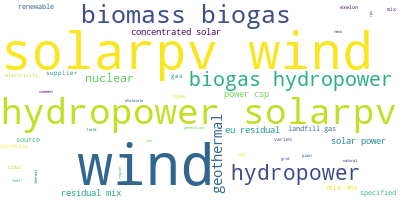

In [70]:
word_cloud(df_qC2_copy, 'response_clean')

As we can see from the image above, words like **wind** and **solar pv**, appears frequently in the text.

Let's see how offen these and other words are common in the whole text.

In [71]:
def words_counts(df, col):
    
    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer(stop_words='english')
    count_data = vectorizer.fit_transform(df[col].tolist())

    words = vectorizer.get_feature_names()
    counts = np.zeros(len(words))
    for i in count_data:
        counts += i.toarray()[0] # Extract the first element of every array

    words_counts = zip(words, counts)
    words_counts = sorted(words_counts, key=lambda x:x[1], reverse=True)[0: 7+1]
    df_words_counts = pd.DataFrame(words_counts, columns=['words', 'counts'])
    
    return(df_words_counts)

In [72]:
words_counts(df_qC2_copy, 'response_clean')

,words,counts
0,wind,317.0
1,solarpv,214.0
2,hydropower,147.0
3,biogas,55.0
4,biomass,55.0
5,mix,16.0
6,geothermal,14.0
7,nuclear,11.0


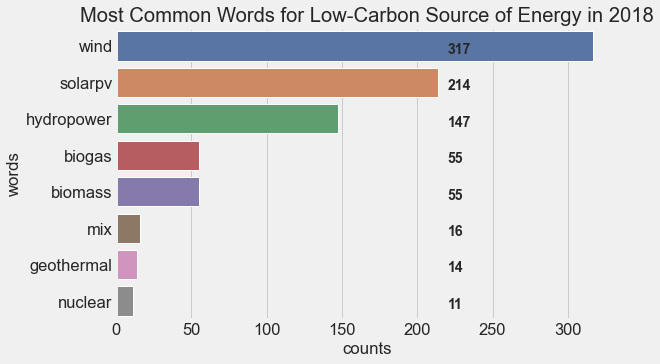

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
plt.title('Most Common Words for Low-Carbon Source of Energy in 2018')
df_w_c_co = words_counts(df_qC2_copy, 'response_clean')
for i in range(len(df_w_c_co)):
    plt.text(220, i + 0.2, int(df_w_c_co['counts'][i]), weight='bold')

sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
ax = sns.barplot(y = "words", x = "counts", data = df_w_c_co)

After the preprocessing text analysis over the `response value` column of the `df_energy18` DataFrame, it can be seen that **wind, solar PV, and hydropower** are the most predominant words. In some cases, the Corporations support **PV solar power**, **wind power**, and **hydropower** energy generation at the same time as renewable energy sources.

## Cities: Analyzing Sources of Renewable Energy<a name="asre"></a>
[back to the top](#TOC)

From [this sub section](#crgc), remember that the `question_number()` function was used to obtain the `df_US_2018_res` DataFrame:

In [74]:
df_US_2018_res.head(3)

,Account Number,Organization,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer
3242,1093,City of Atlanta,NaN,Introduction,0.1,Please give a general description and introduc...,1,Administrative boundary,1,City boundary,City / Municipality
72600,59124,"City of Natchez, MS",NaN,Introduction,0.1,Please give a general description and introduc...,2,Description of city,1,City boundary,"Natchez, MS is the oldest settlement on the Mi..."
150214,59124,"City of Natchez, MS",NaN,Introduction,0.1,Please give a general description and introduc...,1,Administrative boundary,1,City boundary,City / Municipality


In [75]:
print(df_US_2018_res.info()) # It shows the info about the 'columns' of the DataFrame
print('\n')
print(df_US_2018_res['Section'].unique()) # It shows the 'Sections' of the questionary
print('\n')
print(df_US_2018_res['Question Number'].unique()) # It shows the 'Question Numbers' of the questionary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 3242 to 24838
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Number   40119 non-null  int64 
 1   Organization     40119 non-null  object
 2   Parent Section   39198 non-null  object
 3   Section          40119 non-null  object
 4   Question Number  40119 non-null  object
 5   Question Name    40119 non-null  object
 6   Column Number    40119 non-null  int64 
 7   Column Name      36292 non-null  object
 8   Row Number       40119 non-null  int64 
 9   Row Name         10224 non-null  object
 10  Response Answer  40119 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.7+ MB
None


['Introduction' 'City Details' 'Governance' 'Data Management' 'Buildings'
 'Transport' 'Urban Planning' 'Food' 'Waste' 'Water Supply'
 'Water Supply Management' 'Wastewater' 'Climate Hazards' 'Adaptation'
 'Adaptation Actions' 'Social Risks' 'Opp

The `df_renewable_energy()` function below, helps to obtain the `Row Name` and `Response Answer` for the `9.1` question of the `Question Number` column inside `Section` column, which is related with the amount of **renewable energy** (in MW capacity) installed within the city boundary in the categories of **solar PV**, **solar thermal**, **ground or water source**, **wind** or other.

In [76]:
def df_renewable_energy(df, col1, col2, num):
    for i, j in df.groupby(by=col1):
        if i == 'Energy':
            df_j = j[j[col2] == num]
    return(df_j)

In [77]:
df_energy_18 = df_renewable_energy(df_US_2018_res, 'Section', 'Question Number', '9.1')
df_e_18 = df_energy_18[['Row Name', 'Response Answer']]
df_e_18

,Row Name,Response Answer
50177,Renewable district heat/cooling,0
183007,Wind,0
101597,Solar PV,4.12
57406,Solar PV,1522074
7557,Other,0
...,...,...
41924,Ground or water source,2080
151258,Ground or water source,0
96938,Solar PV,52.4
164388,Ground or water source,0


The `erase_sentence()` function below helps erase unnecessary text and transform text into a single string words like: **solar pv** into **solarpv**.

In [78]:
def erase_sentence(text):
    sentence = re.sub(r'\b\w*(renewable district heat cooling)\w*\b', '', text)
    sentence = sentence.replace('solar pv', 'solarpv').strip() #'solar pv' is a repeated word
    sentence = sentence.replace('ground water source', 'GroundWaterSource').strip()
    sentence = sentence.replace('solar thermal', 'SolarThermal').strip() #'solar thermal' is a repeated word
    return(sentence)

The preprocessing text analysis is applied below:

In [79]:
df_e_18_copy = df_e_18.copy() # The original DataFrame is preserved
Row_Name_Clean = df_e_18_copy['Row Name'].apply(lambda x: preprocessing(x))\
                                         .apply(lambda x: erase_sentence(x))
df_e_18_copy['Row_Name_Clean'] = Row_Name_Clean
df_e_18_copy.head()

,Row Name,Response Answer,Row_Name_Clean
50177,Renewable district heat/cooling,0,
183007,Wind,0,wind
101597,Solar PV,4.12,solarpv
57406,Solar PV,1522074,solarpv
7557,Other,0,


As we can see, there are some empty spaces in the new `Row_Name_Clean` column.

As shown below, after deleting these empty spaces, the amount of **renewable energy (in MW)** by 'Wind' and 'Solar' sources are extrated.

In [80]:
# Some some empty rows are deleted applying the code below.
df_e_18_copy = df_e_18_copy[df_e_18_copy['Row_Name_Clean'].str.strip().astype(bool)]
# The 'Response Answer' column is transformed into a 'float' column
df_e_18_copy['Response Answer'] = df_e_18_copy['Response Answer'].apply(float)
# The amount of 'renewable energy (in MW)' by 'Wind' and 'Solar' sources are extrated
df_e_18_MW_s = df_e_18_copy[df_e_18_copy['Response Answer'] > 500]
df_e_18_MW_w = df_e_18_copy[(df_e_18_copy['Response Answer'] > 0.0) & (df_e_18_copy['Response Answer'] < 1)]
print('Solar Sources:')
print(df_e_18_MW_s)
print('\n')
print('Wind Sources:')
print(df_e_18_MW_w)

Solar Sources:
                      Row Name  Response Answer     Row_Name_Clean
57406                 Solar PV        1522074.0            solarpv
47838                 Solar PV       31234000.0            solarpv
44561                 Solar PV        7448433.0            solarpv
154499                Solar PV           1047.5            solarpv
105632                Solar PV           4451.0            solarpv
34382                 Solar PV           1150.0            solarpv
41924   Ground or water source           2080.0  GroundWaterSource


Wind Sources:
        Row Name  Response Answer Row_Name_Clean
121121      Wind            0.001           wind
44017   Solar PV            0.175        solarpv
133920  Solar PV            0.260        solarpv
2291        Wind            0.250           wind
142485  Solar PV            0.166        solarpv
186772      Wind            0.100           wind
68623   Solar PV            0.698        solarpv


According to the **most common words for installed sources of renewable energy** graphic below, there is a correlation with the amount of installed renewable energy via Solar Power Systems that cities have.

According to the table above, there are more cities that have installed renewable energy via photovoltaic systems than via wind devices.

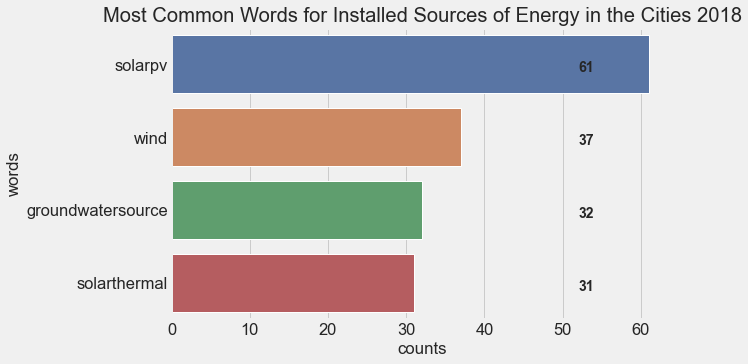

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
plt.title('Most Common Words for Installed Sources of Energy in the Cities 2018')
df_w_c_ci = words_counts(df_e_18_copy, 'Row_Name_Clean')
for i in range(len(df_w_c_ci)):
    plt.text(52, i + 0.1, int(df_w_c_ci['counts'][i]), weight='bold')

sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
ax = sns.barplot(y = "words", x = "counts", data = df_w_c_ci)

## Conclusions<a name="conclusions"></a>
[back to the top](#TOC)

After analyzing the impact of low-carbon technology used by Corporations over the sources of renewable energy used by Cities in the US during 2018, has been found that,

 - a) The most low-carbon energy source technology used by Corporations are predominantly wind devices, photovoltaic systems that store solar energy, and hydropower energy.

 - b) The amount of installed renewable energy in natural environments or cities' boundaries is mainly solar energy and wind energy, as shown in the graphics of the last two sections.

So, it is possible to generate a collaboration bridge between corporations and cities, considering that the pick demand for electricity by the cities can be balanced by the energy storage of renewable energy given by the corporations. This also would reduce the cost-effectiveness of energy consumption in cities, giving a better quality of life in the society.